In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from validphys.loader import FallbackLoader as Loader
from validphys.api import API

# Settings and fit names

In [21]:
use_t0 = True #set use_t0 for all the notebook
NDATA = 4616 #number of data in the fit
FITDATA = 3438
VALDATA = NDATA - FITDATA
VARCHI2 = 1.0 / NDATA #Varchi2 normalized to ndata
seed_list = [99843, 92935, 91761, 91361, 89580, 88921, 86725, 81843, 78995, 71347, 7023, 68128, 66694, 64348, 61880, 56857, 5403, 44830, 38229, 36240, 35205, 3345348918, 20168, 12919, 10290]
multiCt = True

In [3]:
config_common = {"dataset_inputs":{"from_": "fit"}, "datacuts":{"from_":"fit"}, "use_cuts":{"from_": "datacuts"}, "fakepdf":{"from_":"closuretest"}, "theory":{"from_":"fit"}, "theoryid":{"from_":"theory"}, "t0theoryid":"717", "pdf":{"from_": "fit"}, "closuretest":{"from_": "fit"}, "filterseed":{"from_":"closuretest"}, "use_fitcommondata": True, "use_t0": use_t0, "t0pdfset":{"from_":"datacuts"} }

In [4]:
# fit_names = [f"NNPDF40_nnlo_as_0{n}_corr_s{l}" for l in "12" for n in [1140,1150,1160,1170,1175,1180,1185,1190,1195,1200,1210,1220]]

#NOTE: 0.1990 was mistakenly done with theoryID 0.0120 instead
#fit_names = [f"240218-rs-nnpdf40-corr-mhou-0{n}" for n in range(1140,1220+1,10)]
# fit_names = [f"240219-rs-nnpdf40-corr-0{n}" for n in range(1140,1220+1,10)]

# Closure fit names (not iterated and no MHOU)

#fit_names = [f"240301-ab-ct-alphas{n}-noMHOU" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] #ct-results
#fit_names = [f"240306-ab-ct-alphas{n}-noMHOU_t0sampling" for n in range(114, 122+1, 1)] #ct-results with t0 also in sampling
#fit_names = [f"240311-ab-ct-alphas{n}-noMHOU_DIS" for n in range(114, 122+1, 1)] #ct-results DIS-only
#fit_names = [f"240311-ab-ct-alphas{n}-noMHOU_DIS_noGPOS" for n in range(114, 122+1, 1)] #ct-results DIS-only, no gluon Positivity
#fit_names = [f"240311-ab-ct-alphas{n}-noMHOU_DIS_newseed_changed" for n in range(114, 122+1, 1)] #ct-results DIS-only, new seeds
#fit_names = [f"240411-ab-ct-alphas{n}-nlo" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] #ct-results at NLO
#fit_names = [f"240423-ab-ct-alphas{n}-nlo-allADD" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] #ct-results at NLO with only ADD uncertainties
#fit_names = [f"240423-ab-ct-alphas{n}-nlo-matcht0set" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] #ct-results at NLO with only t0pdfset matched each to the alpha_s values
#fit_names = [f"240429-ab-ct-alphas{n}-nlo-samet0covmat_updated" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] #ct-results at NLO with t0 matrix constructed with central theory
#fit_names = [f"240429-ab-ct-alphas{n}-nlo-samet0covmat_newseeds" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] # same of previous but with filterseed, nnseed and mcseed changed
#fit_names = [f"240503-ab-ct-alphas{n}-nlo-samet0covmat_with120central" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] # changed central alphas to 0.120
#fit_names = [f"240506-ab-ct-alphas{n}-nlo-samet0covmatwithunknown118central" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] # Here the fakedata have been generated with alpha_s=0.118 but then we faked we did not know that and we fitted with a t0theoryid and t0pdfset with alpha_s=0.120, to fake the real case scenario
#fit_names = [f"240508-ab-ct-alphas{n}-nlo-samet0covmat-withunknown118central-assumingalpha130" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] # Here the fakedata have been generated with alpha_s=0.118 but then we faked we did not know that and we fitted with a t0theoryid and t0pdfset with alpha_s=0.130, to fake the real case scenario
if multiCt:
    fit_names = [[f"240513-ab-multict-fseed{seed}-alphas{n}-nlo-alpha118t0covmat" for n in ([106] + [i for i in range(114, 125+1, 1)] +[130])] for seed in seed_list] # Here the fakedata have been generated with alpha_s=0.118 but then we faked we did not know that and we fitted with a t0theoryid and t0pdfset with alpha_s=0.130, to fake the real case scenario

# Loading the fits

In [5]:
l = Loader()
if multiCt:
    fits = [[l.check_fit(f) for f in f_seed] for f_seed in fit_names]
else:
    fits = [l.check_fit(f) for f in fit_names]

In [6]:
from collections import defaultdict
seed_as_list = []
if multiCt:
    for f_seed in fits:
        as_fits = defaultdict(list)
        for f in f_seed:
            th = f.as_input()["theory"]["theoryid"]
            alpha = float(API.theory_info_table(theory_db_id = th).loc["alphas"])
            as_fits[alpha].append(f)
        as_fits = dict(as_fits)
        seed_as_list.append(as_fits)   
else:
    as_fits = defaultdict(list)
    for f in fits:
        th = f.as_input()["theory"]["theoryid"]
        alpha = float(API.theory_info_table(theory_db_id = th).loc["alphas"])
        as_fits[alpha].append(f)
    as_fits = dict(as_fits)
    seed_as_list.append(as_fits)

In [7]:
if multiCt:
    indexes = [{f: API.fitted_replica_indexes(pdf=f.name) for f in f_seed} for f_seed in fits]
    replica_data = [{f: API.replica_data(fit=f.name) for f in f_seed} for f_seed in fits]
else:
    indexes = [{f: API.fitted_replica_indexes(pdf=f.name) for f in fits}]
    replica_data = [{f: API.replica_data(fit=f.name) for f in fits}]

# Correlated replica method (CRM)

# Some useful functions

In [23]:
def measure(replica_data):
    return replica_data.training*(FITDATA/NDATA) + replica_data.validation*(VALDATA/NDATA)
    # return replica_data.chi2
def fit_parabola(data, exp=False, bootstrap_err=None):
    mins = {}
    for ind, row in data.iterrows():
        if bootstrap_err is not None:
            weights = [1./std for std in bootstrap_err.values[0]]
            a, b, c = np.polyfit(data.columns, row, 2, w=weights)
        else:
            a, b, c = np.polyfit(data.columns, row, 2)
        if not np.isnan(b): # NaN if not all replicas passed postfit
            mins[ind] = -b / 2 / a
        # mins[ind] = data.columns[np.where(row==row.min())][0]
    mins = pd.Series(mins)
    if exp: 
        uncer = np.sqrt(VARCHI2/a)
        if bootstrap_err is not None:
            plt.scatter(data.columns,data.values,  color="blue" )
            plt.errorbar(data.columns, data.values[0], yerr=bootstrap_err.values[0], fmt="o")
            plt.plot(np.linspace(0.106, 0.130), [a*x*x + b*x + c for x in np.linspace(0.106, 0.130)], color="black", linestyle="--")
        else:
            plt.scatter(data.columns,data.values, color="blue" )
            plt.plot(np.linspace(0.106, 0.130), [a*x*x + b*x + c for x in np.linspace(0.106, 0.130)], color="black", linestyle="--")
        return mins[0], uncer
    return mins
def describe_results(mins):
    print(mins.describe(percentiles=[0.16,0.84]))
    print("")
    print(f"cv±std = {mins.mean():.5f} ± {mins.std():.5f} ")
    print(f"1std interval:  {mins.mean()-mins.std():.5f} to {mins.mean()+mins.std():.5f} ")
    print(f"68% c.i:        {mins.describe(percentiles=[0.16,0.84])[4]:.5f} to {mins.describe(percentiles=[0.16,0.84])[6]:.5f} ")
    return mins.mean()
def plot_results(mins):
    from validphys.plotutils import kde_plot
    fig, ax = plt.subplots()
    kde_plot(mins,ax=ax)
    central = (mins.describe(percentiles=[0.16,0.84])[6] + mins.describe(percentiles=[0.16,0.84])[4])/2
    unc = (mins.describe(percentiles=[0.16,0.84])[6] - mins.describe(percentiles=[0.16,0.84])[4])/2
    ax.set_title(f"68% c.i: {central:.5f}  ± {unc:.5f}  -- MHOU")
    #ax.set_xlim(0.118,0.13)
    ax.set_xlabel(r"$\alpha_s$")
    plt.show()
def hist_results(mins, data, namefig=None):
    plt.hist(mins,bins=data.columns-0.0005,edgecolor='black',density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    from scipy.stats import norm
    # p = np.exp(-((x-mins.mean())/mins.std())**2/2)*mins.size/np.sqrt(2*np.pi)
    p = norm.pdf(x, mins.mean(), mins.std())
    plt.plot(x,p,'k',label=f"{mins.mean():.5f} +/- {mins.std():.5f}")
    plt.yticks([])
    plt.legend()
    if namefig is not None:
        plt.savefig(namefig)
    else:
        plt.show()
def apply_bootstrap(replicas_chi2, Npart=10):
    #shuffle the array
    np.random.shuffle(replicas_chi2)
    #split the shuffled array
    splitted_replicas_chi2s = np.split(replicas_chi2, Npart)
    #compute the chi2 mean for each of the splits
    means_replicas_chi2s = [np.mean(entry) for entry in splitted_replicas_chi2s]
    #compute the variance of the ensable
    return np.std(means_replicas_chi2s)

## Compute the chi2 a posteriori for the CRM (DEPRECATED, NOT USEFUL ANYMORE)
This is done in such a way we are free to use or not the t0 prescription

In [ ]:
data_crm_posteriori = []
for as_fits_seed, index_seed in zip(seed_as_list, indexes): #In case of single feed this will contain only one dictionary
    replica_chi2_crm = {}
    for alpha, flist in as_fits_seed.items():
        chi2s_replica = []
        for f in flist:
            config_common["fit"] = f.name
            config_common["fits"] = [f.name] #This is used only to load replica 1 data, and it currently needs a list of fits
            chi2s_replica.append(pd.Series(API.replica_chi2_level1(**config_common), index=index_seed[flist[0]])) #This function is only present in the branch closure_with_same_level1
        replica_chi2_crm[alpha] = pd.DataFrame(chi2s_replica).min() #NB: We do the min here. Should we instead do the mean?
    data_crm_posteriori.append(pd.DataFrame(replica_chi2_crm))

In [ ]:
mins_crm_posteriori = [fit_parabola(data_crm) for data_crm in data_crm_posteriori]
for mins in mins_crm_posteriori:
    describe_results(mins)

In [ ]:
for mins in mins_crm_posteriori:
    plot_results(mins)

In [ ]:
for mins, data in zip(mins_crm_posteriori, data_crm_posteriori):
    hist_results(mins, data)

In [ ]:
for data in data_crm_posteriori:
    plt.plot(data_crm_posteriori.columns, np.array(data_crm_posteriori.T))

## Taking the Chi2 from the fit Info
They are computed with the t0 prescription

In [24]:
data_crm = []
for as_fits_seed, index_seed, replica_data_seed in zip(seed_as_list, indexes, replica_data): #In case of single feed this will contain only one dictionary
    min_values = {}
    for alpha, flist in as_fits_seed.items():
        series = []
        for f in flist:
            s = [measure(d) for d in replica_data_seed[f]]
            series.append(pd.Series(s, index=index_seed[f]))
        min_values[alpha] = pd.DataFrame(series).min()
    data_crm.append(pd.DataFrame(min_values))

In [25]:
mins_crm = [fit_parabola(data) for data in data_crm]
mins_mean = []
for mins in mins_crm:
    mins_mean.append(describe_results(mins))

count    58.000000
mean      0.118392
std       0.000332
min       0.117610
16%       0.118097
50%       0.118421
84%       0.118684
max       0.119225
dtype: float64

cv±std = 0.11839 ± 0.00033 
1std interval:  0.11806 to 0.11872 
68% c.i:        0.11810 to 0.11868 
count    65.000000
mean      0.118596
std       0.000344
min       0.117692
16%       0.118324
50%       0.118607
84%       0.118921
max       0.119378
dtype: float64

cv±std = 0.11860 ± 0.00034 
1std interval:  0.11825 to 0.11894 
68% c.i:        0.11832 to 0.11892 
count    64.000000
mean      0.118252
std       0.000344
min       0.117483
16%       0.117884
50%       0.118309
84%       0.118574
max       0.118913
dtype: float64

cv±std = 0.11825 ± 0.00034 
1std interval:  0.11791 to 0.11860 
68% c.i:        0.11788 to 0.11857 
count    60.000000
mean      0.118569
std       0.000406
min       0.117755
16%       0.118153
50%       0.118535
84%       0.119024
max       0.119414
dtype: float64

cv±std = 0.11857 ± 0.00041 


cv±std = 0.11821 ± 0.00025 


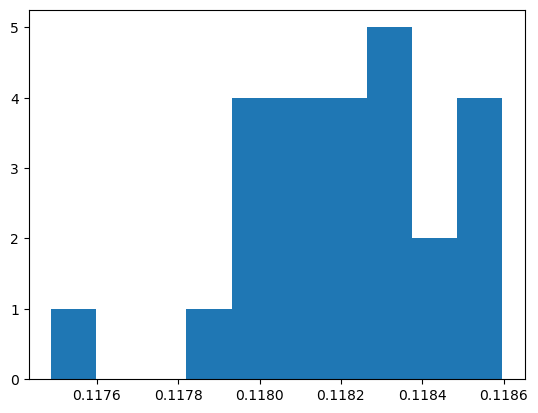

In [26]:
plt.hist(mins_mean)
print(f"cv±std = {np.average(mins_mean):.5f} ± {np.std(mins_mean):.5f} ")

In [ ]:
for mins in mins_crm:
    plot_results(mins)

In [ ]:
for mins, data in zip(mins_crm, data_crm):
    hist_results(mins, data)

In [ ]:
for data in data_crm:
    plt.plot(data.columns, np.array(data.T))
    plt.show()

# Experimental ("naive") method

First we try computing the chi2 for the replica 0

In [ ]:
data_expmeth_replica0 = []
for as_fits_seed in seed_as_list: #In case of single feed this will contain only one dictionary
    central_chi2 = {}
    for alpha, flist in as_fits_seed.items():
        chi2s_replica0 = []
        for f in flist:
            config_common["fit"] = f.name
            config_common["fits"] = [f.name] #This is used only to load replica 1 data, and it currently needs a list of fits
            chi2s_replica0.append(API.central_chi2_level1(**config_common)) #This function is only present in the branch closure_with_same_level1
        central_chi2[alpha] = pd.DataFrame(chi2s_replica0).min()
    data_expmeth_replica0.append(pd.DataFrame(central_chi2))

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240411-ab-ct-alphas118-nlo/240411-ab-ct-alphas118-nlo_0000.dat
240411-ab-ct-alphas118-nlo PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed99843-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed99843-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed99843-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed92935-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed92935-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed92935-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91761-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed91761-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91761-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed91361-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed91361-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed91361-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed89580-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed89580-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed89580-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed88921-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed88921-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed88921-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed86725-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed86725-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed86725-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed81843-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed81843-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed81843-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed78995-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed78995-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed78995-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed71347-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed71347-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed71347-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed7023-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed7023-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed7023-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas124-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas124-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas124-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas125-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas125-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas125-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed68128-alphas130-nlo-alpha118t0covmat/240513-ab-multict-fseed68128-alphas130-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed68128-alphas130-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas106-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas106-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas106-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas114-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas114-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas114-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas115-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas115-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas115-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas116-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas116-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas116-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas117-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas117-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas117-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas118-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas118-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas118-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas119-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas119-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas119-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "8e-05" on line: 206, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for 

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas120-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas120-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas120-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "9e-05" on line: 5470, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas121-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas121-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas121-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas122-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas122-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas122-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

LHAPDF 6.4.0 loading /Users/andrea/miniconda3/envs/nnpdf/share/LHAPDF/240513-ab-multict-fseed66694-alphas123-nlo-alpha118t0covmat/240513-ab-multict-fseed66694-alphas123-nlo-alpha118t0covmat_0000.dat
240513-ab-multict-fseed66694-alphas123-nlo-alpha118t0covmat PDF set, member #0, version 1


/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-05" on line: 1, column: 70

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for J

/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JSON nor for YAML 1.2

Correct your float: "1e-10" on line: 1, column: 9

or alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel_yaml.error.MantissaNoDotYAML1_1Warning)


  warnings.warn(MantissaNoDotYAML1_1Warning(node, value_so))
/Users/andrea/miniconda3/envs/nnpdf/lib/python3.9/site-packages/ruamel_yaml/constructor.py:517: MantissaNoDotYAML1_1Warning: 
In YAML 1.1 floating point values should have a dot ('.') in their mantissa.
See the Floating-Point Language-Independent Type for YAML™ Version 1.1 specification
( http://yaml.org/type/float.html ). This dot is not required for JS

In [ ]:
results_expmeth = [fit_parabola(data_expmeth, exp=True) for data_expmeth in data_expmeth_replica0]
for res in results_expmeth:
    print(f"cv±std = {res[0]:.5f} ± {res[1]:.5f} ")

In [ ]:
plt.hist(np.array(results_expmeth).T[0])
print(f"cv±std = {np.average(np.array(results_expmeth).T[0], weights=1./np.array(results_expmeth).T[1]):.5f} ± {np.std(np.array(results_expmeth).T[0]):.5f} ")

# DEPRECATED

In [ ]:
central_chi2_replicas = {}
bootstrap_err_chi2_replicas = {}
for alpha, flist in as_fits.items():
    chi2s_replicas = []
    chi2s_bootstrap_err = []
    for f in flist:
        config_common["fit"] = f.name
        config_common["fits"] = [f.name] #This is used only to load replica 1 data, and it currently needs a list of fits
        replicas_chi2=API.replica_chi2_level1(**config_common)
        chi2s_bootstrap_err.append(apply_bootstrap(np.array(replicas_chi2), Npart=10))
        chi2s_replicas.append(np.mean(replicas_chi2)) #This function is only present in the branch closure_with_same_level1
    central_chi2_replicas[alpha] = pd.DataFrame(chi2s_replicas).min()
    bootstrap_err_chi2_replicas[alpha] = pd.DataFrame(chi2s_bootstrap_err).min() #maybe not min?
data_expmeth_replicas = pd.DataFrame(central_chi2_replicas)
bootstrap_expmeth_replicas = pd.DataFrame(bootstrap_err_chi2_replicas)

In [ ]:
min_exp_meth_replicas, uncer_replicas = fit_parabola(data_expmeth_replicas, exp=True, bootstrap_err=bootstrap_expmeth_replicas)
print(f"cv±std = {min_exp_meth_replicas:.5f} ± {uncer_replicas:.5f} ")

## Fixed PDF at alphas=0.118 (DEPRECATED)

In [ ]:
central_chi2_fixedpdf = {}
for alpha, flist in as_fits.items():
    chi2s_replica0 = []
    for f in flist: 
        config_common["fit"] = f.name
        config_common["fits"] = [f.name] #This is used only to load replica 1 data, and it currently needs a list of fits
        config_common["pdf"] = "240311-ab-ct-alphas118-noMHOU_DIS_noGPOS"
        chi2s_replica0.append(API.central_chi2_level1(**config_common)) #This function is only present in the branch closure_with_same_level1
    central_chi2_fixedpdf[alpha] = pd.DataFrame(chi2s_replica0).min()
data_expmeth_replica0_fixedpdf = pd.DataFrame(central_chi2_fixedpdf)

In [ ]:
min_exp_meth_fixedpdf, uncer = fit_parabola(data_expmeth_replica0_fixedpdf, exp=True)
print(f"cv±std = {min_exp_meth_fixedpdf:.5f} ± {uncer:.5f} ")